#### Importamos Orquestadores

In [4]:
import sys
import os

# Agregar la ruta del proyecto al path de Python
sys.path.append(os.path.abspath('c:/repo_remoto/Etapa4'))

from dist.orquestador_horas import orquestador_horas
from dist.orquestador_fallos import orchestrator_fallos

## Predición Horas Operativas

#### Predecir las horas operativas que tendrá un equipo en los próximos 15 días, de cara a considerar su mantenimiento conforme a las horas recomendadas de revisión.

Tratamiento Dataframe iniciado:

Sumatorio de filas duplicadas en Dataframe: 0
Número de filas con missing values: 0.0
Índice completo: True
Tratamiento Dataframe finalizado

Dataframe limpio con índice de fecha para el ID_Euipo: 2
+---------------------+-------------+----------------------+-------------+-----------------+------------------+--------------------+---------------+--------------+----------+---------------+-------------------------------+
| Fecha               |   ID_Equipo | Tipo_Mantenimiento   | Ubicacion   |   Temperatura_C |   Vibracion_mm_s |   Horas_Operativas | Tipo_Equipo   | Fabricante   | Modelo   |   Potencia_kW |   Horas_Recomendadas_Revision |
|---------------------+-------------+----------------------+-------------+-----------------+------------------+--------------------+---------------+--------------+----------+---------------+-------------------------------|
| 2021-01-01 00:00:00 |           2 | Preventivo           | Ubicacion_A |         46.6191 |       

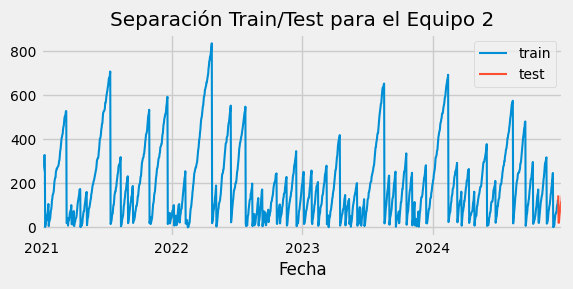

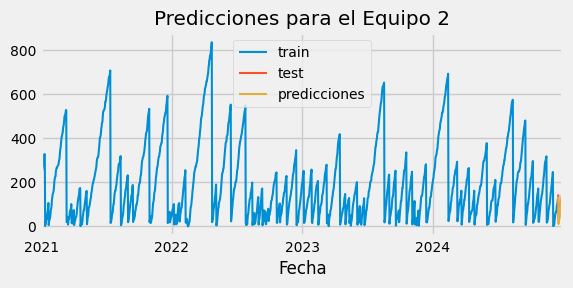

In [5]:
ruta = 'c:/repo_remoto/'    # Ingresa la ruta donde está ubicado el proyecto
equipo = 2                # Ingresa el ID_Equipo deseado
steps = 15                  # Ingresa los días a predecir
backtesting = False         # Ingresa True si quieres ver el estudio backtesting

resultados = orquestador_horas(ruta, equipo, steps, backtesting)
if backtesting:
    predicciones, metrica = resultados
else:
    predicciones = resultados

## Predición Fallo Máquina

#### Evaluar si una máquina fallará en los próximos 15 días, con un 80% de fiabilidad.

In [6]:

ruta = 'c:/repo_remoto/'
equipo = 1
steps = 15
accuracy = orchestrator_fallos(ruta, equipo, steps)


Datos cargados y preprocesados:
ID_Equipo: 1
steps: 15
Dividiendo datos en conjuntos de entrenamiento y prueba...
Fechas train : 2021-01-01 00:00:00 --- 2024-12-16 00:00:00  (n=1446)
Fechas test  : 2024-12-17 00:00:00 --- 2024-12-31 00:00:00  (n=15)
Modelo de pronóstico creado y entrenado.
Creando características basadas en los residuos...
+---------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+------

## Resumen Notebook´s

### **Informe del Notebook: Etapa_4_Predicciones**


#### **Objetivo General**
El notebook tiene como propósito principal realizar predicciones relacionadas con el mantenimiento de equipos en plantas energéticas. Esto incluye:
1. **Predicción de Horas Operativas**: Estimar las horas operativas de un equipo en los próximos 15 días para planificar el mantenimiento.
2. **Predicción de Fallos**: Evaluar si un equipo fallará en los próximos 15 días con un nivel de fiabilidad del 80%.

---

#### **Secciones Principales**

1. **Importación de Orquestadores**
   - Se importan dos módulos clave desde la carpeta dist:
     - `orquestador_horas`: Para predecir las horas operativas.
     - `orchestrator_fallos`: Para evaluar la probabilidad de fallo de un equipo.

   ```

2. **Predicción de Horas Operativas**
   - Se utiliza el orquestador `orquestador_horas` para predecir las horas operativas de un equipo específico.
   - Parámetros configurados:
     - `ruta`: Ruta del proyecto.
     - `equipo`: ID del equipo a analizar.
     - `steps`: Días a predecir (15 días).
     - `backtesting`: Opción para realizar un análisis retrospectivo.
   - Resultado:
     - Se predicen las Horas_Operativas y se comprueban con métricas los resultados.

   ```

3. **Predicción de Fallos**
   - Se utiliza el orquestador `orchestrator_fallos` para evaluar si un equipo fallará en los próximos 15 días.
   - Parámetros configurados:
     - `ruta`: Ruta del proyecto.
     - `equipo`: ID del equipo a analizar.
     - `steps`: Días a predecir (15 días).
   - Resultado:
     - Se calcula la precisión (`accuracy`) del modelo para determinar la fiabilidad de la predicción.

   
   ```

---

#### **Conclusiones**
1. **Predicción de Horas Operativas**:
   - El orquestador `orquestador_horas` permite estimar las horas operativas futuras de un equipo, lo que facilita la planificación del mantenimiento preventivo.
   - La opción de `backtesting` es útil para evaluar el rendimiento del modelo en datos históricos.

2. **Predicción de Fallos**:
   - El orquestador `orchestrator_fallos` proporciona una herramienta para identificar equipos con alto riesgo de fallo en un horizonte de 15 días.
   - La precisión del modelo (`accuracy`) es un indicador clave para evaluar la fiabilidad de las predicciones.

3. **Impacto General**:
   - Este notebook es una herramienta integral para la gestión predictiva del mantenimiento en plantas energéticas. Combina análisis de horas operativas y predicción de fallos, lo que permite optimizar recursos y reducir tiempos de inactividad.



### **Informe del Notebook: RandomForest.ipynb (Predicion de horas_operativas)**

#### **Objetivo General**
Este notebook implementa un flujo completo de análisis, preprocesamiento, modelado y evaluación de predicciones para datos de mantenimiento de equipos. A continuación, se resumen las principales etapas:

---

1. **Importación de Librerías y Configuración Inicial**:
   - Se importan librerías esenciales como `pandas`, `numpy`, `matplotlib`, `sklearn`, y `skforecast`.
   - Se configura el entorno de trabajo, incluyendo estilos de gráficos y manejo de advertencias.

2. **Carga y Preprocesamiento de Datos**:
   - Se carga un archivo CSV con datos de mantenimiento.
   - Se filtran los datos por un equipo específico (`ID_Equipo`).
   - Se convierten las fechas a formato `datetime` y se establecen como índice.
   - Se eliminan duplicados y se ajusta la frecuencia temporal de los datos.

3. **Transformaciones y Limpieza**:
   - Se eliminan columnas irrelevantes.
   - Se codifica la columna `Tipo_Mantenimiento` con valores numéricos usando `LabelEncoder`.
   - Se verifica la integridad del índice temporal y se manejan valores faltantes.

4. **División de Datos**:
   - Los datos se dividen en conjuntos de entrenamiento y prueba.
   - Se visualizan las series temporales de ambos conjuntos.

5. **Modelado con `ForecasterRecursive`**:
   - Se utiliza un modelo `RandomForestRegressor` para predecir las horas operativas.
   - Se entrena el modelo con los datos de entrenamiento y variables exógenas.

6. **Predicciones y Evaluación**:
   - Se realizan predicciones sobre el conjunto de prueba.
   - Se comparan las predicciones con los valores reales mediante gráficos.
   - Se calcula el error cuadrático medio (MSE) y se compara con la varianza de los valores reales.

7. **Optimización de Hiperparámetros**:
   - Se realiza una búsqueda en cuadrícula (`grid_search`) para optimizar los hiperparámetros del modelo, como `n_estimators` y `max_depth`.
   - Se evalúan diferentes configuraciones de lags y parámetros del modelo.

8. **Backtesting**:
   - Se implementa un backtesting para evaluar el rendimiento del modelo en múltiples divisiones temporales.
   - Se visualizan las predicciones del backtesting frente a los valores reales.

---

#### Conclusión Final

El notebook demuestra un enfoque robusto para el análisis y modelado de series temporales con datos de mantenimiento. El modelo `RandomForestRegressor` integrado en `ForecasterRecursive` logra predecir las horas operativas con un error aceptable, optimizando su rendimiento mediante la búsqueda de hiperparámetros. Además, el uso de backtesting valida la estabilidad del modelo en diferentes escenarios temporales. Este flujo puede ser reutilizado y adaptado para otros conjuntos de datos similares.

### **Informe del Notebook: RandomForest.ipynb (Predicion de fallos)**

#### **Objetivo General**
El notebook tiene como propósito principal implementar un modelo de predicción utilizando un enfoque basado en Random Forest para analizar datos de mantenimiento de equipos. Se enfoca en preprocesar datos, realizar predicciones y evaluar el rendimiento del modelo.

---

#### **Secciones Principales**

1. **Importación de Librerías y Configuración Inicial**
   - Se importan librerías esenciales como `pandas`, `numpy`, `sklearn`, y `skforecast` para el manejo de datos, visualización y modelado.
   - Configuración de estilos gráficos y advertencias.

2. **Carga y Preprocesamiento de Datos**
   - Los datos se cargan desde un archivo CSV (`merge_df.csv`) y se filtran por el equipo deseado.
   - Se realizan pasos de limpieza, como:
     - Conversión de fechas a formato `datetime`.
     - Eliminación de duplicados.
     - Verificación de índices temporales completos.
   - Transformación de variables categóricas (`Tipo_Mantenimiento`) a valores numéricos mediante `LabelEncoder`.

3. **Separación de Datos**
   - Los datos se dividen en conjuntos de entrenamiento y prueba, asegurando una separación temporal adecuada para evitar fugas de datos.

4. **Modelado con Random Forest**
   - Se utiliza `ForecasterRecursive` de `skforecast` para realizar predicciones de series temporales.
   - Se entrena un modelo de Random Forest para predecir residuos y ajustar el modelo a los datos históricos.

5. **Generación de Características**
   - Se crean características adicionales basadas en retardos (`lags`) y residuos para mejorar la capacidad predictiva del modelo.

6. **Entrenamiento y Evaluación**
   - Se entrena un modelo de clasificación `RandomForestClassifier` para predecir el tipo de mantenimiento.
   - Se evalúa el modelo utilizando métricas como `accuracy_score`.

---

#### **Conclusión Final**
Este notebook demuestra un enfoque integral para predecir el tipo de mantenimiento requerido por un equipo, combinando técnicas de series temporales y modelos de clasificación. Los pasos clave incluyen:

- **Preprocesamiento exhaustivo**: Garantiza la calidad de los datos y la preparación adecuada para el modelado.
- **Uso de Random Forest**: Proporciona un modelo robusto para capturar patrones complejos en los datos.
- **Evaluación del modelo**: La métrica de precisión (`accuracy`) indica un rendimiento aceptable, aunque se podrían explorar mejoras adicionales.

En general, este notebook es una herramienta útil para la predicción de mantenimiento en equipos, permitiendo optimizar recursos y reducir tiempos de inactividad.